In [79]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Get and formalize latest data
cases_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_csv = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
cases = cases_csv.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
deaths = deaths_csv.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

In [116]:
# for i in range(cases.columns.size):
#     print(cases.iloc[i].values)

pak_cases = cases.loc[cases_csv['Country/Region'] == 'Pakistan']
pak_deaths = deaths.loc[cases_csv['Country/Region'] == 'Pakistan']
total_confirmed_cases = pak_cases.copy().iloc[0].values
last_week_new_cases = pak_cases.copy().iloc[0].values
last_week_new = total_confirmed_cases[0]
for i in range(len(total_confirmed_cases)):
    if i > 7:
        last_week_new = total_confirmed_cases[i] - total_confirmed_cases[i - 7]
    last_week_new_cases[i] = last_week_new

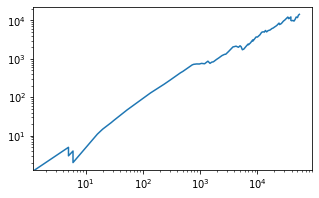

In [117]:
# Plotting
plt.plot(total_confirmed_cases, last_week_new_cases)
plt.xscale('log')
plt.yscale('log')
# More width
plt.rcParams["figure.figsize"] = (5,3)
plt.show()